In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import PIL
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [4]:
cd AnalysisCode/

/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode


In [5]:
from ImageAnalysis import ImageAnalysisCode

# Load Pictures

In [6]:
pwd

'/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode'

In [7]:
path = '/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/Data/2024/11-2024/25 Nov 2024/FLIR/Align LS'
paths = [path]

In [8]:
rowstart = 300
rowend = 750
columnstart = 450
columnend = 900

Pictures from the new code and get rawImg and OptDenOptDen

In [40]:
optDen, cat, rawImg = ImageAnalysisCode.PreprocessBinImgs(*paths, camera='cha', 
                           examRange=[0, None], rotateAngle=0,
                           rowstart=rowstart, rowend=rowend, columnstart=columnstart, columnend=columnend, 
                           subtract_burntin=0, skipFirstImg='auto', showRawImgs=0, returnRawImgs=1,
                           filterLists=[], 
                           loadVariableLog=1, rebuildCatalogue=1,
                           dirLevelAfterDayFolder=2)


subtract burntin	 0
skip firstImg		 0
picture/iteration	 3
first frame			 0
Warning! The log is 0.94 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.94 s
Warning! The log is 0.14 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.15 s
Warning! The log is 0.73 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.74 s
Warning! The log is 0.20 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.21 s
Warning! The log is 0.24 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.25 s
Warning! The log is 0.48 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.49 s
Warning! The log is 0.69 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time inter

Run the old code and get images_array and columnDensities

Warning! The log is 0.94 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.94 s
Warning! The log is 0.14 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.15 s
Warning! The log is 0.73 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.74 s
Warning! The log is 0.20 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.21 s
Warning! The log is 0.24 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.25 s
Warning! The log is 0.48 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.49 s
Warning! The log is 0.69 s earlier than the data file, potential mismatching!
Picked the logfile earlier, the time interval is 0.70 s
Finish calculating columnDensities.


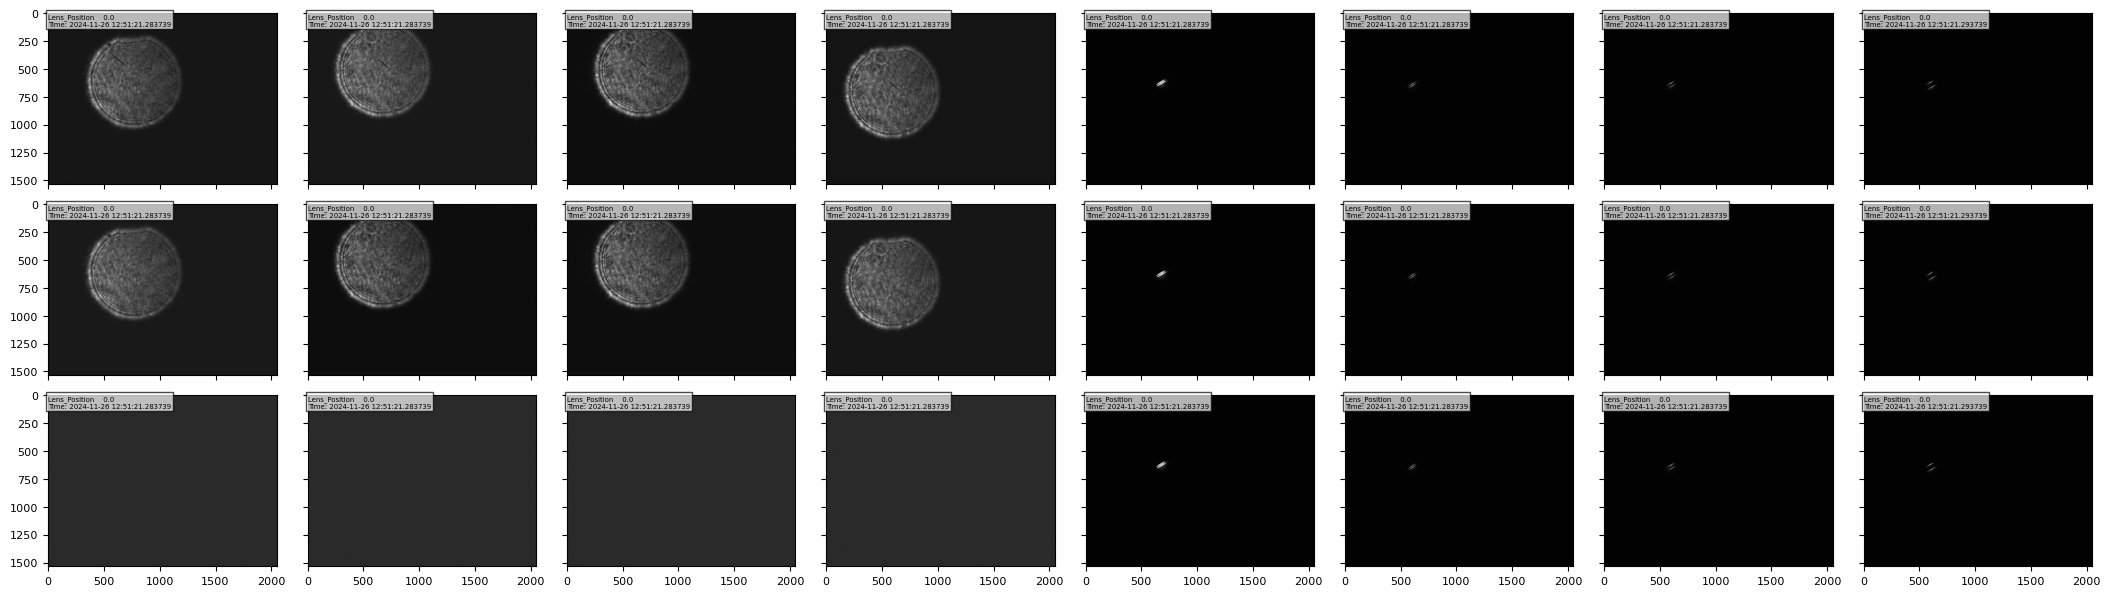

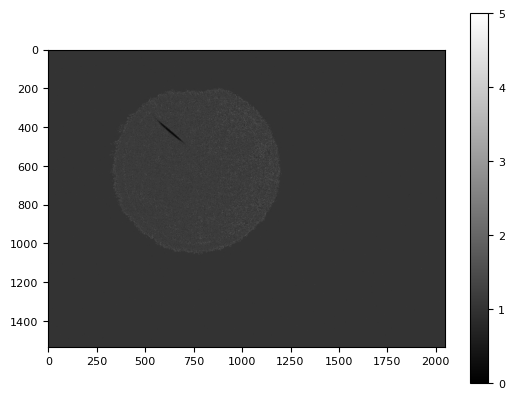

column_density_xylim = (450, 900, 300, 750)
Center x: 776.692426797163
Center y: 631.9897118553914
Number of atoms:0e6
column_density_xylim = (450, 900, 300, 750)
Center x: 667.2650269059999
Center y: 517.8429011771256
Number of atoms:0e6
difference in center x: -109.42739989116308
difference in center y: -114.14681067826587
column_density_xylim = (450, 900, 300, 750)
Center x: 663.9597515138943
Center y: 454.412645331399
Number of atoms:0e6
column_density_xylim = (450, 900, 300, 750)
Center x: 588.3882257604196
Center y: 1358.5953781486571
Number of atoms:0e6
difference in center x: -75.5715257534747
difference in center y: 904.182732817258
column_density_xylim = (450, 900, 300, 750)
Center x: 679.6813791897117
Center y: 638.9547207900265
Number of atoms:0e6
column_density_xylim = (450, 900, 300, 750)
Center x: 604.4545039115969
Center y: 654.4728427527783
Number of atoms:0e6
difference in center x: -75.22687527811479
difference in center y: 15.51812196275182
column_density_xylim = (4

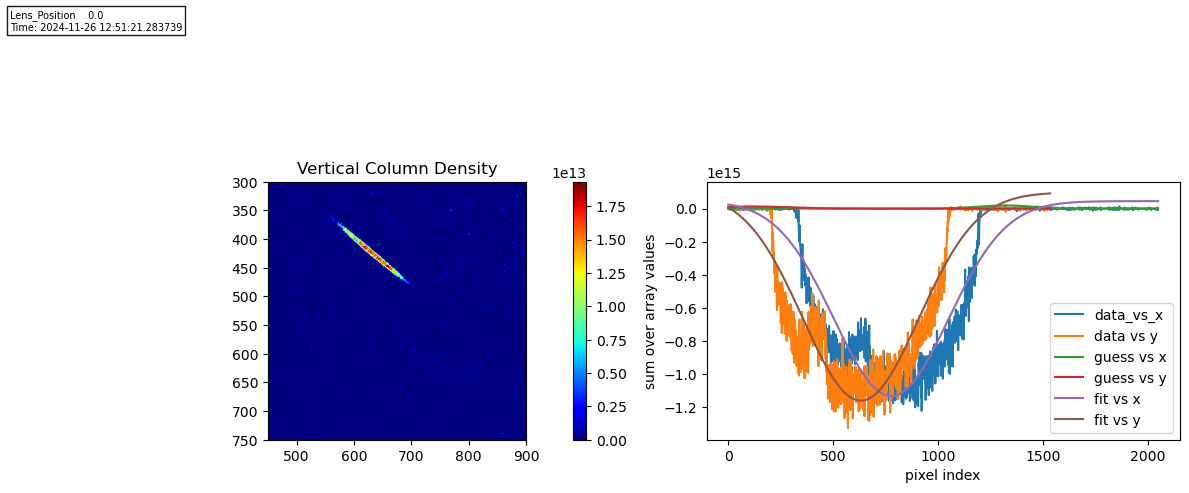

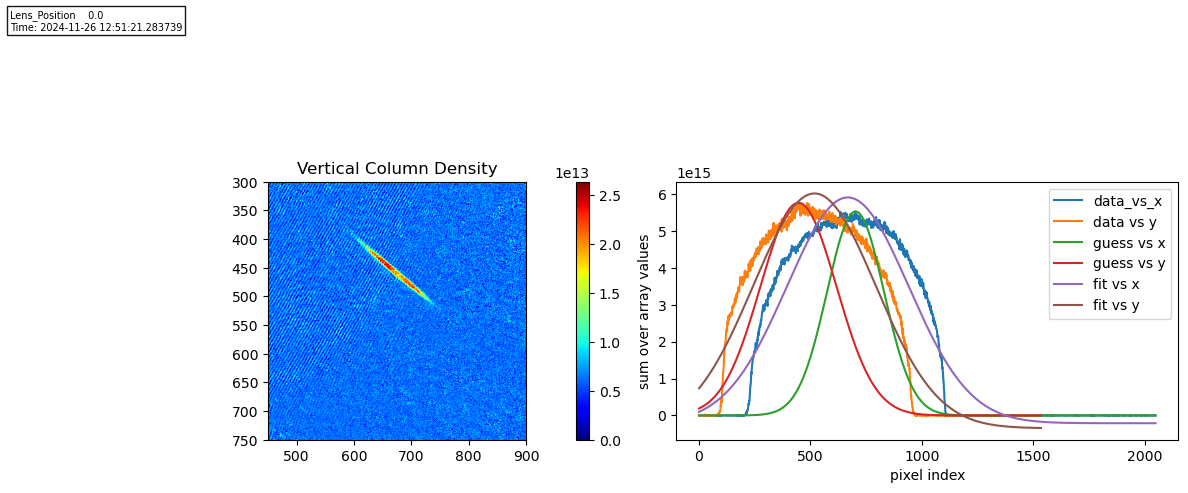

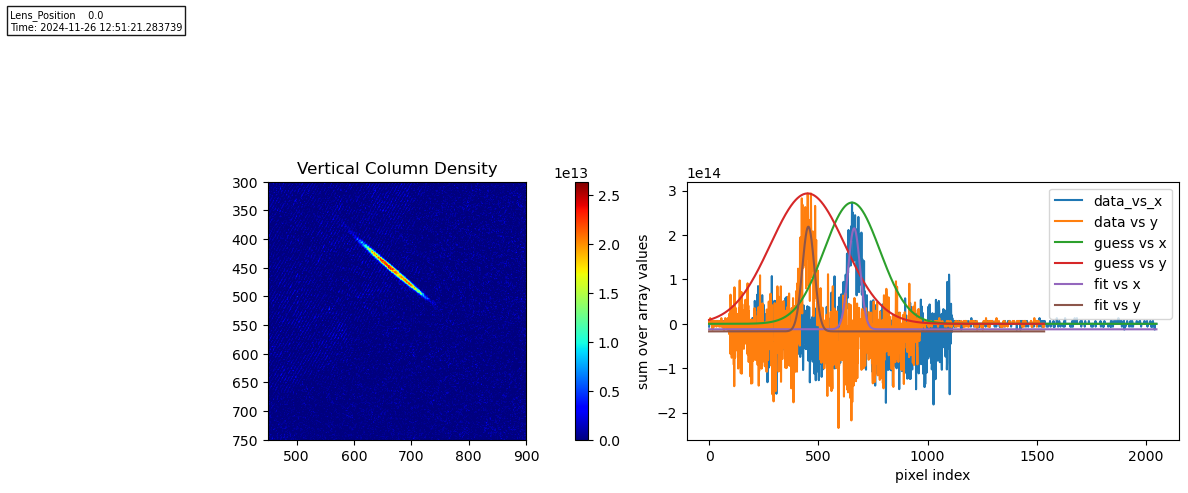

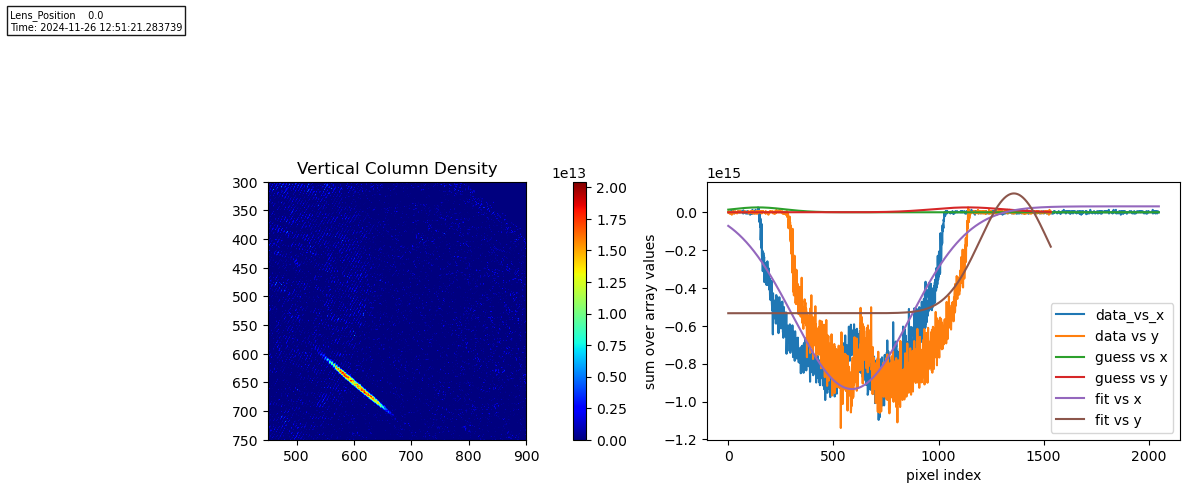

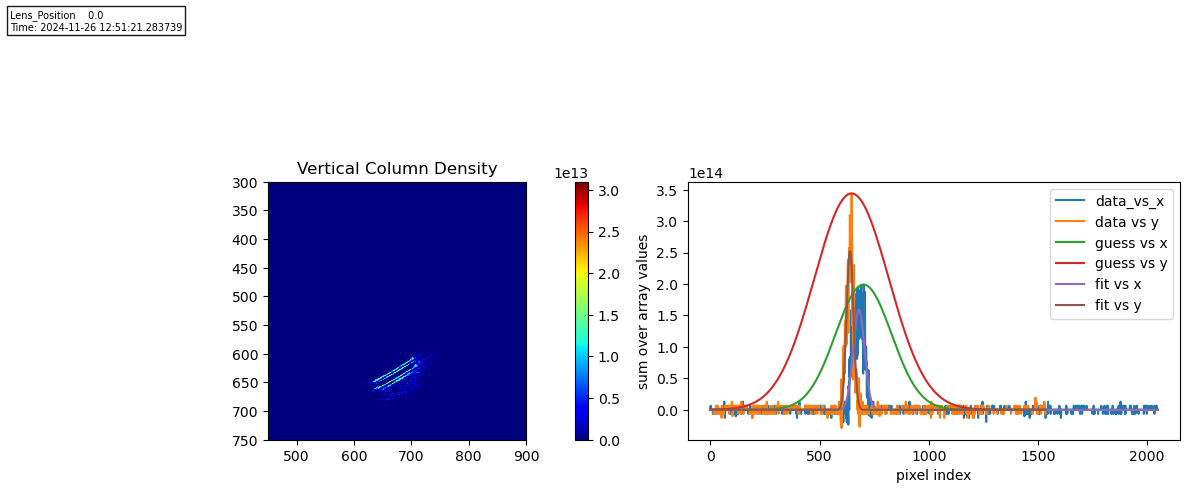

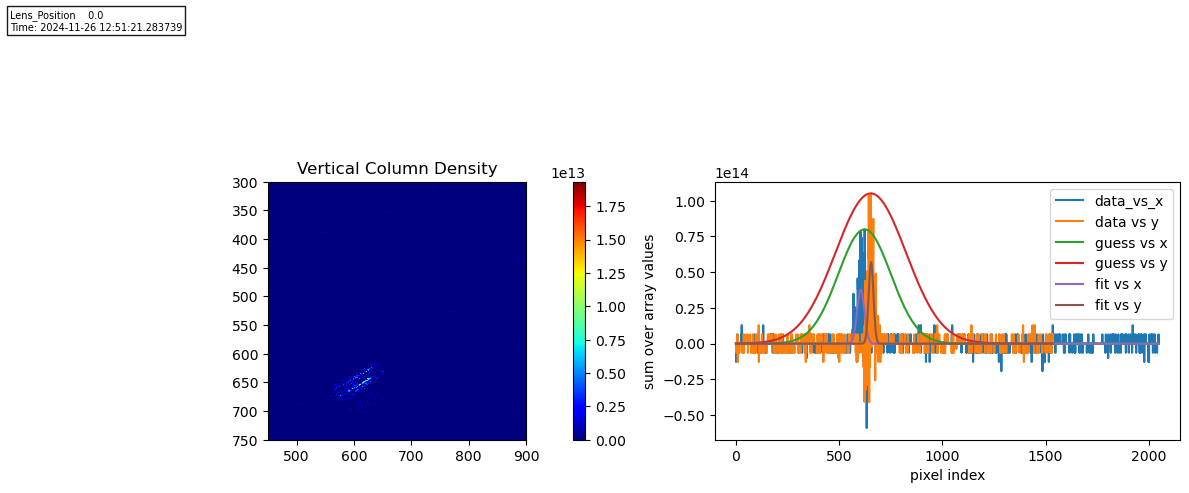

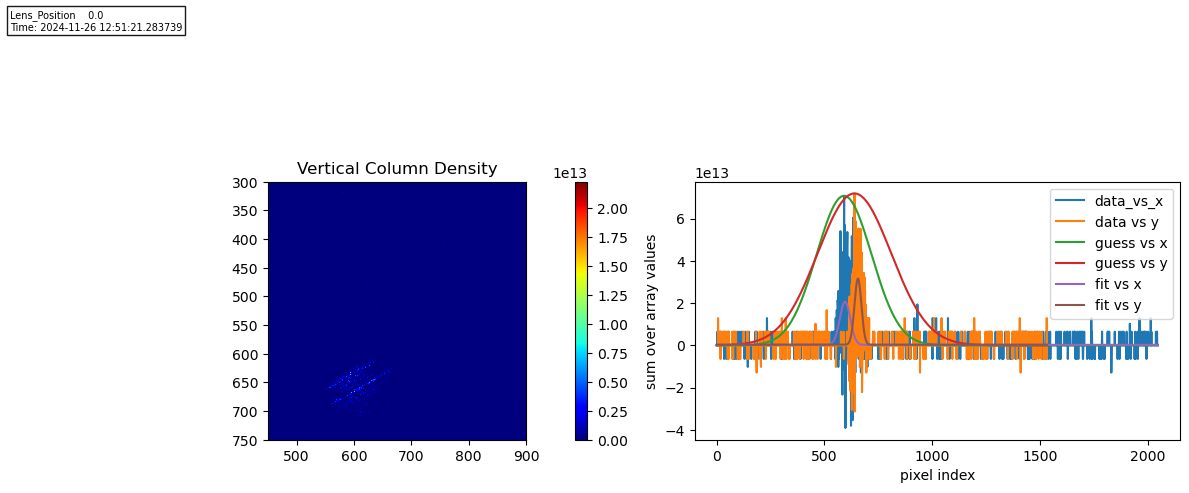

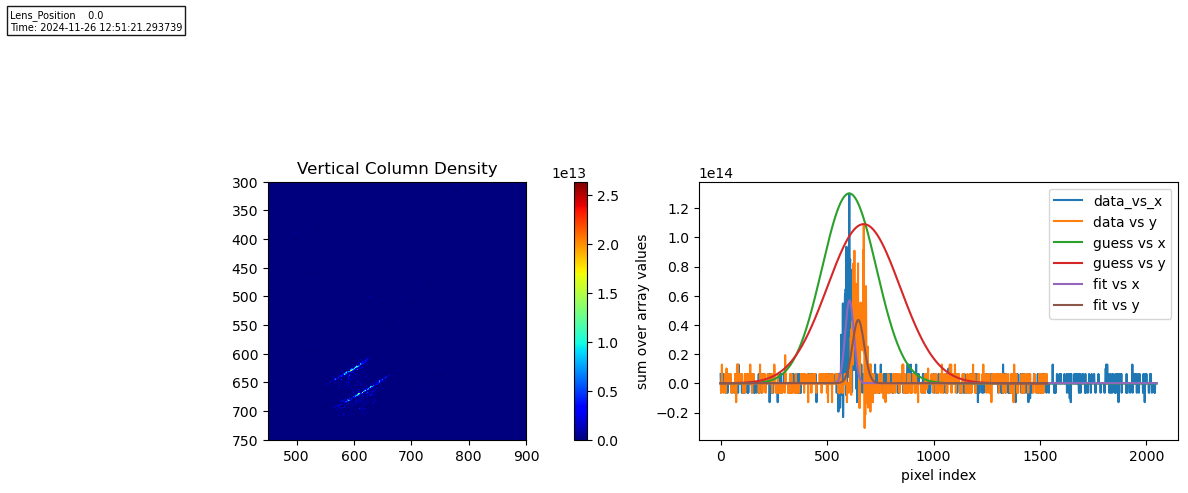

In [10]:
run 'Applications/analyze chameleon binary.py'

In [35]:
params.cross_section

1.0748712109895707e-13

In [48]:
rawImg_old = images_array
rawImg_old.shape

(8, 3, 1534, 2048)

In [20]:
rawImg.shape

(8, 3, 1534, 2048)

In [49]:
np.array_equal(rawImg_old, rawImg)

True

In [41]:
optDen.shape

(8, 450, 450)

In [23]:
columnDensities.shape

(8, 1534, 2048)

*the mismatch in size is because the crop is removed from absImageSimple and commited at the end of preprocess, or in the guassian fit in the old chameleon code*

In [42]:
#crop and rescale 
columnDensitiesCrop = columnDensities[:, rowstart:rowend, columnstart:columnend]
optDen_old = columnDensitiesCrop * params.cross_section
optDen_old.shape

(8, 450, 450)

In [46]:
optDen_old.max(), optDen_old.min()

(3.332204510175204, -2.995732273553991)

In [47]:
optDen.max(), optDen.min()

(11.090339630053647, -11.090339630053647)

*New optical density*

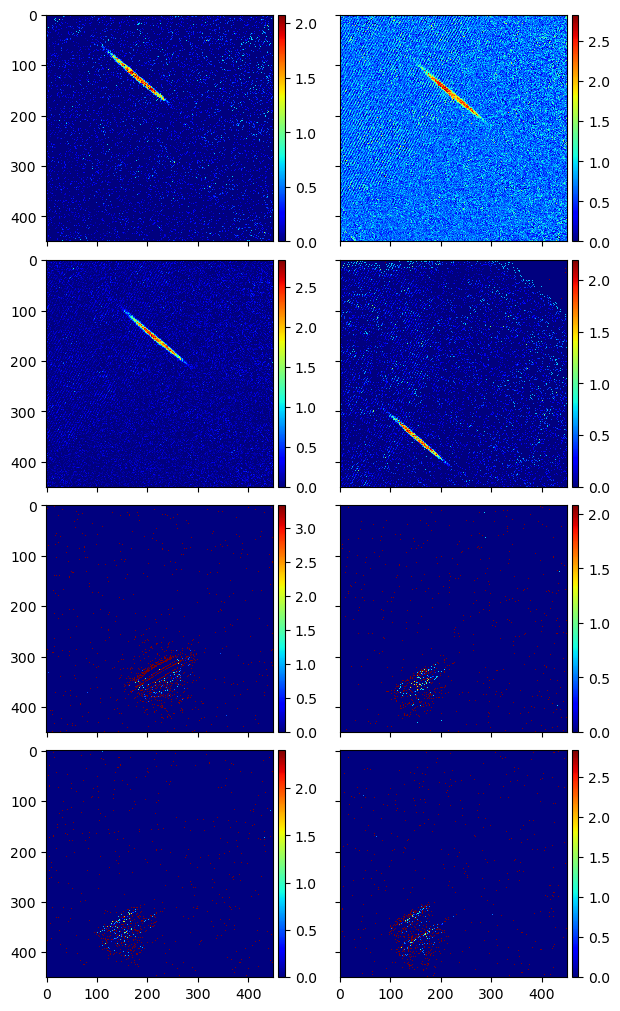

In [50]:
fig, axes = plt.subplots(4, 2, figsize=[6,10],
                         sharex=True, sharey=True,
                         layout='constrained')
ax = axes.flatten()
for ii in range(len(ax)):
    im = ax[ii].imshow(optDen[ii], cmap='jet', 
                       interpolation='nearest',
                       vmin=0, 
                       vmax=optDen_old[ii].max() # set the vmax to the max in the old CDs
                      )
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

*Old optical Densities*

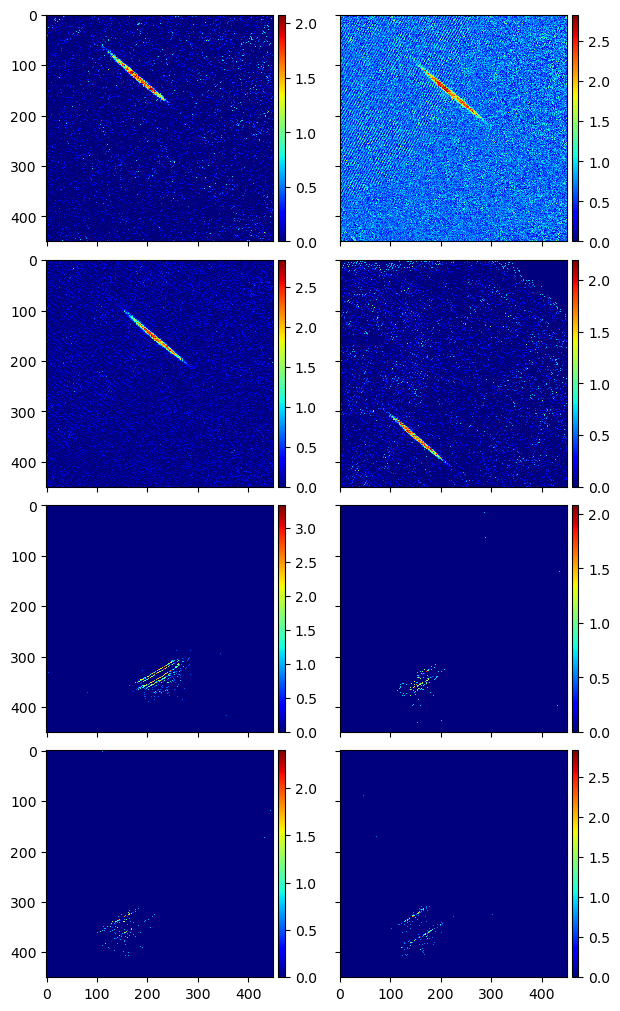

In [51]:
fig, axes = plt.subplots(4, 2, figsize=[6, 10],
                         sharex=True, sharey=True,
                         layout='constrained')
ax = axes.flatten()
for ii in range(len(ax)):
    im = ax[ii].imshow(optDen_old[ii], cmap='jet',
                       interpolation='nearest',
                       vmin=0, 
                       # vmax=colDenImg[ii].max()
                      )
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

In [31]:
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'nearest'

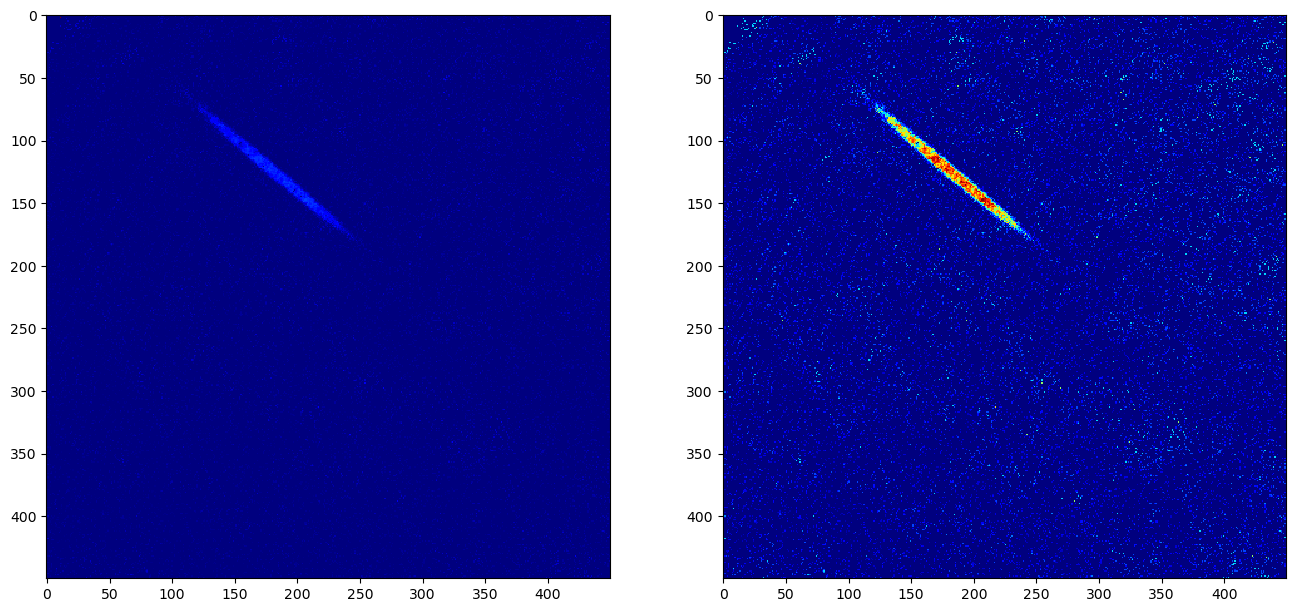

In [52]:
vlim=[0, None]
fig, ax = plt.subplots(1, 2, figsize=(16, 12))
ax[0].imshow(optDen[0], clim=vlim)
ax[1].imshow(optDen_old[0], clim=vlim)

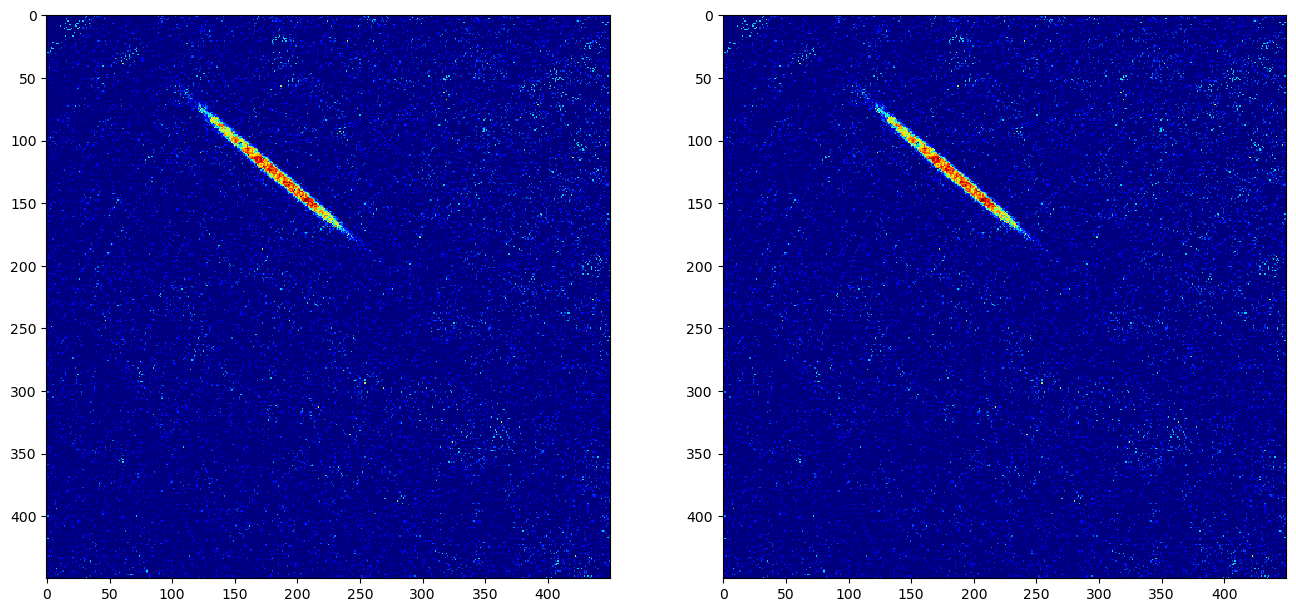

In [54]:
vlim=[0, optDen_old[0].max()]
fig, ax = plt.subplots(1, 2, figsize=(16, 12))
ax[0].imshow(optDen[0], clim=vlim)
ax[1].imshow(optDen_old[0], clim=vlim)

In [55]:
diff = optDen[0] - optDen_old[0]

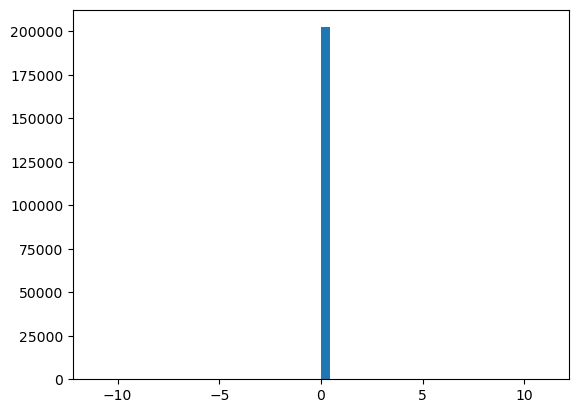

In [56]:
plt.hist(diff.flatten(), bins=50);

In [57]:
np.unique(diff)

array([-1.10903396e+01, -1.10903396e+01, -2.22044605e-16, -2.77555756e-17,
        0.00000000e+00,  1.10903396e+01])

(array([6.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.90000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.02395e+05]),
 array([-2.22044605e-16, -2.17603713e-16, -2.13162821e-16, -2.08721929e-16,
        -2.04281037e-16, -1.99840144e-16, -1.95399252e-16, -1.90958360e-16,
        -1.86517468e-16, -1.82076576e-16, -1.77635684e-16, -1.73194792e-16,
        -1.68753900e-16, -1.64313008e-16

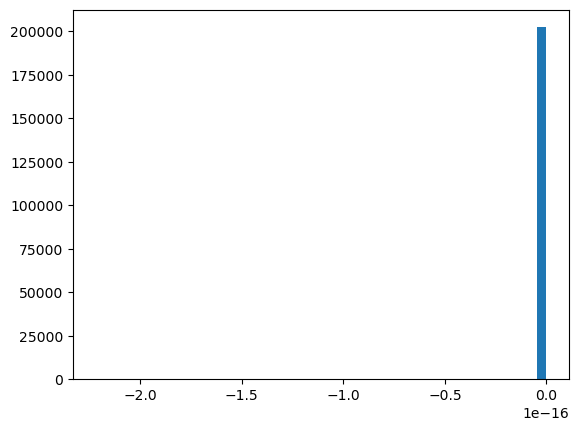

In [62]:
plt.hist( diff[  np.abs(diff) < 10 ], bins=50)

In [ ]:
diff.ab

In [58]:
rat = optDen[0] / optDen_old[0]

/tmp/ipykernel_80/1347595515.py:1: RuntimeWarning: divide by zero encountered in divide
  rat = optDen[0] / optDen_old[0]
/tmp/ipykernel_80/1347595515.py:1: RuntimeWarning: invalid value encountered in divide
  rat = optDen[0] / optDen_old[0]


In [59]:
np.unique(rat)

array([       -inf, -6.99998899, -5.89081545, -5.1896364 ,  1.        ,
        1.        ,  1.        ,         nan])

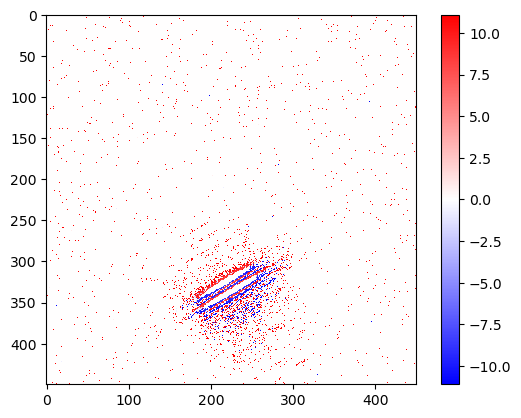

In [308]:
plt.imshow(colDenImg[4], cmap='bwr',
          # vmin=0
          )
plt.colorbar()

In [309]:
colDenImg[4].min(), colDenImg[4].max()

(-11.090339630053647, 11.090339630053647)

In [310]:
columnDensitiesCrop[4].min(), columnDensitiesCrop[4].max()

(-2.78706159670608, 3.1000965288738533)

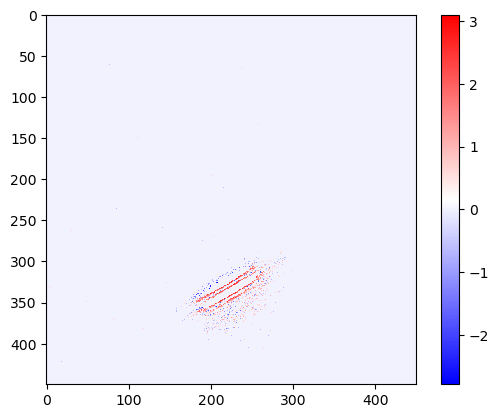

In [306]:
plt.imshow(columnDensitiesCrop[4], cmap='bwr',
           # vmin=colDenImg[4].min(), vmax=colDenImg[4].max()
          )
plt.colorbar()

In [ ]:
params = ImageAnalysisCode.ExperimentParams(date, t_exp = t_exp, picturesPerIteration= picturesPerIteration, cam_type = "chameleon")

In [ ]:
_, _, _, columnDensities, _, _ = ImageAnalysisCode.absImagingSimple(images_array, 
                                                                    params=params, 
                firstFrame=0, correctionFactorInput=1, rowstart = rowstart, rowend = rowend, columnstart = columnstart,
                columnend = columnend, subtract_burntin=0, preventNAN_and_INF=True)

In [48]:
OP1 = ImageAnalysisCode.absImagingSimpleV2(images_array)

/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode/ImageAnalysis/ImageAnalysisCode.py:1634: RuntimeWarning: divide by zero encountered in divide
  ratio = subtracted1 / subtracted2
/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode/ImageAnalysis/ImageAnalysisCode.py:1634: RuntimeWarning: invalid value encountered in divide
  ratio = subtracted1 / subtracted2


Finish calculating opticalDensity.


/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode/ImageAnalysis/ImageAnalysisCode.py:1643: RuntimeWarning: divide by zero encountered in log
  opticalDensity = -1 * np.log(ratio)
/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode/ImageAnalysis/ImageAnalysisCode.py:1643: RuntimeWarning: invalid value encountered in log
  opticalDensity = -1 * np.log(ratio)


In [44]:
columnDensities_orig = columnDensities

subtract burntin	 0
skip firstImg		 1
picture/iteration	 4
first frame			 1
Loading pictures: |
Finish loading pictures, 12 raw images loaded.
Finish calculating columnDensities.
Fitting y data: |
Fitting x data: |
Finish fitting data.


/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode/ImageAnalysis/ImageAnalysisCode.py:2909: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = dfmean[fitYVar].unstack()
/home/idies/workspace/Storage/lianmign/persistent/UCA_Coding_Test/AnalysisCode/ImageAnalysis/ImageAnalysisCode.py:2931: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  


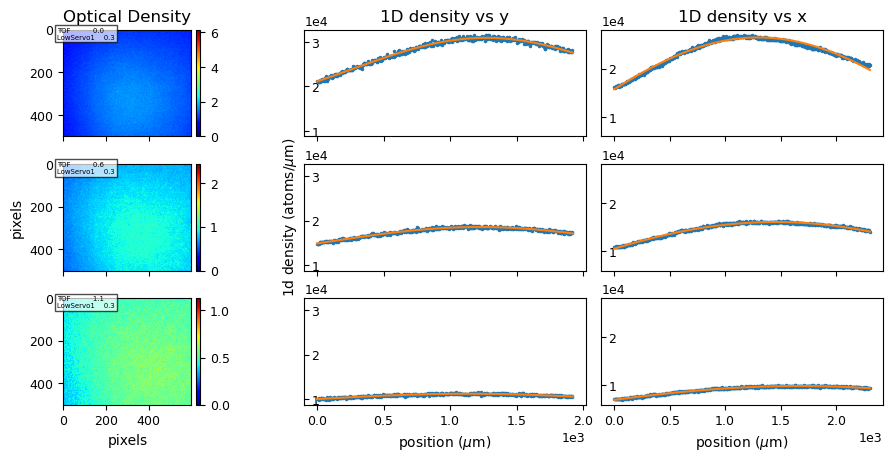

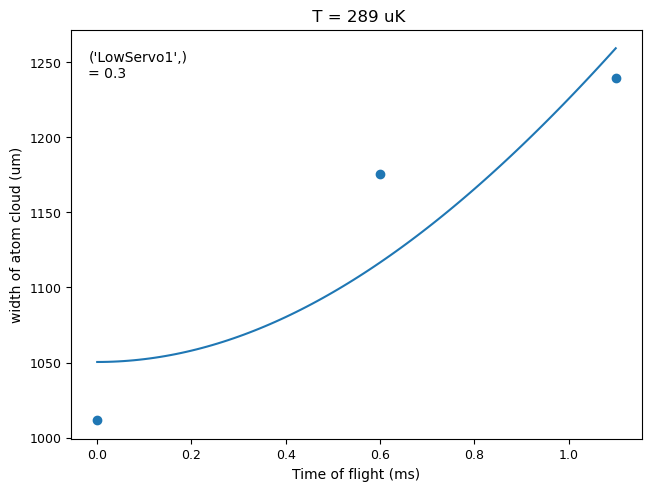

In [50]:
run 'Applications/Analyze Zyla_Mar2024.py'

In [46]:
columnDensities_new = columnDensities

In [47]:
diff = columnDensities_orig / columnDensities_new

In [48]:
diff.max()

1.0

In [39]:
np.unique(diff)

array([1.])

In [40]:
params.cross_section

1.0748712109895707e-13